In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv(r'C:\Users\ask12\Desktop\ML Projects\Churn Prediction\data\WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [4]:
df.shape

(7043, 21)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.describe

<bound method NDFrame.describe of       customerID  gender  SeniorCitizen Partner Dependents  tenure  \
0     7590-VHVEG  Female              0     Yes         No       1   
1     5575-GNVDE    Male              0      No         No      34   
2     3668-QPYBK    Male              0      No         No       2   
3     7795-CFOCW    Male              0      No         No      45   
4     9237-HQITU  Female              0      No         No       2   
...          ...     ...            ...     ...        ...     ...   
7038  6840-RESVB    Male              0     Yes        Yes      24   
7039  2234-XADUH  Female              0     Yes        Yes      72   
7040  4801-JZAZL  Female              0     Yes        Yes      11   
7041  8361-LTMKD    Male              1     Yes         No       4   
7042  3186-AJIEK    Male              0      No         No      66   

     PhoneService     MultipleLines InternetService OnlineSecurity  ...  \
0              No  No phone service             DS

In [7]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

In [8]:
# Target column
target_col = 'Churn'

# Demographic features
demographic_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

# Service/Usage-related features
usage_cols = ['PhoneService', 'MultipleLines', 'InternetService', 
              'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
              'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure']

# Contract/Billing-related features
billing_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod', 
                'MonthlyCharges', 'TotalCharges']

# Binary categorical columns (mostly Yes/No or 0/1)
binary_cols = ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 
               'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
               'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']

# Numeric columns
num_cols = ['tenure', 'MonthlyCharges', 'TotalCharges']

# Display grouped info for sanity check
print("Target Column:", target_col)
print("Demographic Columns:", demographic_cols)
print("Usage Columns:", usage_cols)
print("Billing/Contract Columns:", billing_cols)
print("Binary Categorical Columns:", binary_cols)
print("Numeric Columns:", num_cols)


Target Column: Churn
Demographic Columns: ['gender', 'SeniorCitizen', 'Partner', 'Dependents']
Usage Columns: ['PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'tenure']
Billing/Contract Columns: ['Contract', 'PaperlessBilling', 'PaymentMethod', 'MonthlyCharges', 'TotalCharges']
Binary Categorical Columns: ['Partner', 'Dependents', 'PhoneService', 'PaperlessBilling', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Churn']
Numeric Columns: ['tenure', 'MonthlyCharges', 'TotalCharges']


In [5]:
# Convert TotalCharges to numeric (handle non-numeric values)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'].str.strip(), errors='coerce')

C:\Users\ask12\AppData\Local\Temp\ipykernel_18396\3823661248.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Churn', palette='Set2')


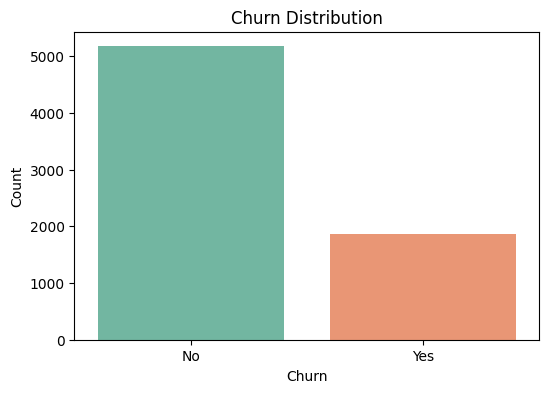

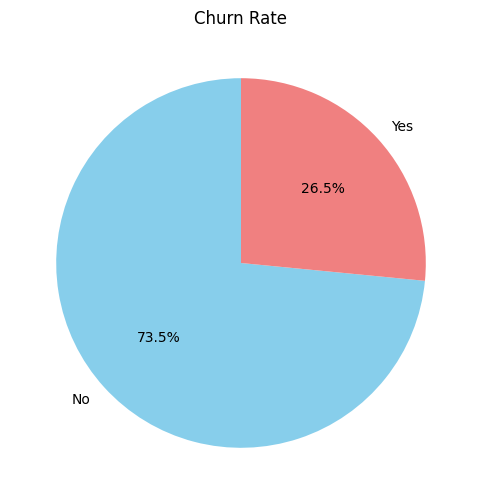

In [10]:
# 📊 Churn Countplot
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Churn', palette='Set2')
plt.title('Churn Distribution')
plt.xlabel('Churn')
plt.ylabel('Count')
plt.savefig('../images/churn_distribution_bar.png', bbox_inches='tight')
plt.show()

# 🥧 Churn Pie Chart
plt.figure(figsize=(6, 6))
df['Churn'].value_counts().plot.pie(
    autopct='%1.1f%%',
    startangle=90,
    labels=['No', 'Yes'],
    colors=['skyblue', 'lightcoral']
)
plt.title('Churn Rate')
plt.ylabel('')
plt.savefig('../images/churn_distribution_pie.png', bbox_inches='tight')
plt.show()


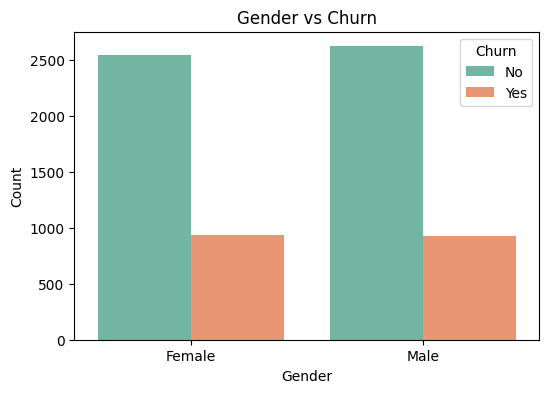

In [11]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='gender', hue='Churn', palette='Set2')
plt.title('Gender vs Churn')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.savefig('../images/gender_vs_churn.png', bbox_inches='tight')
plt.show()


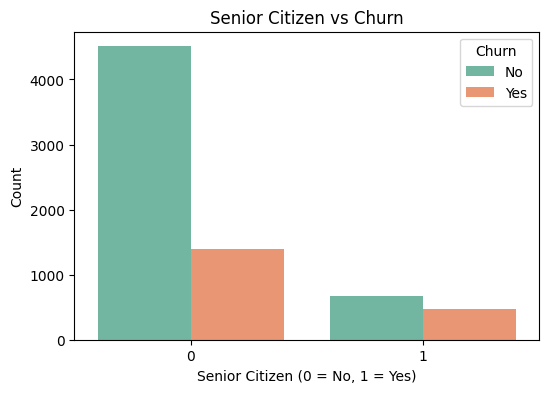

In [12]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='SeniorCitizen', hue='Churn', palette='Set2')
plt.title('Senior Citizen vs Churn')
plt.xlabel('Senior Citizen (0 = No, 1 = Yes)')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.savefig('../images/senior_citizen_vs_churn.png', bbox_inches='tight')
plt.show()


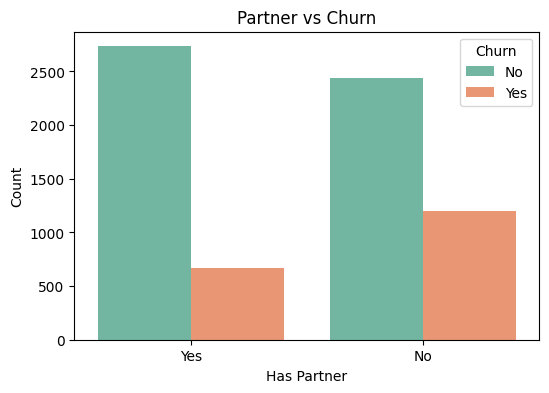

In [13]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Partner', hue='Churn', palette='Set2')
plt.title('Partner vs Churn')
plt.xlabel('Has Partner')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.savefig('../images/partner_vs_churn.png', bbox_inches='tight')
plt.show()


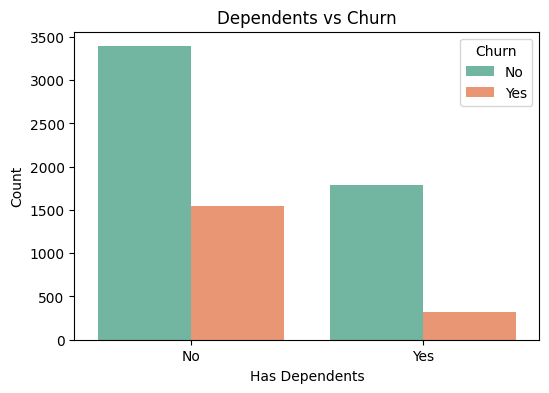

In [14]:
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Dependents', hue='Churn', palette='Set2')
plt.title('Dependents vs Churn')
plt.xlabel('Has Dependents')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.savefig('../images/dependents_vs_churn.png', bbox_inches='tight')
plt.show()


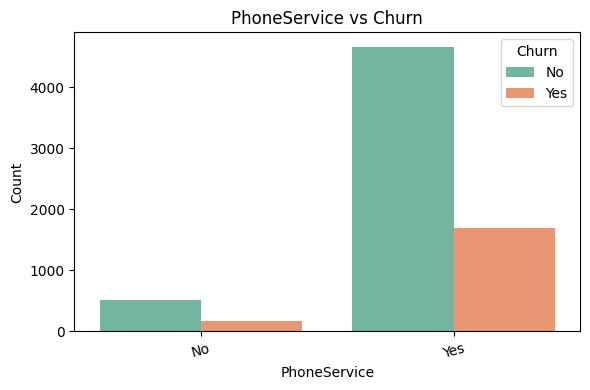

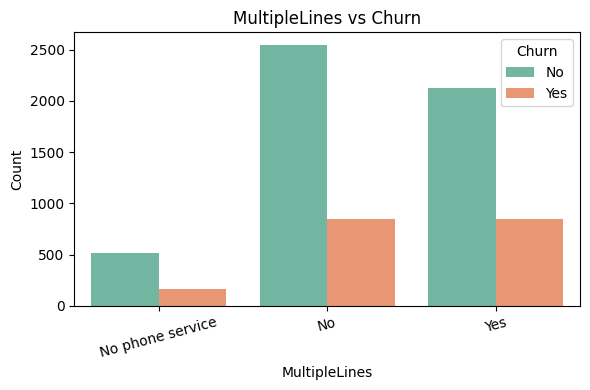

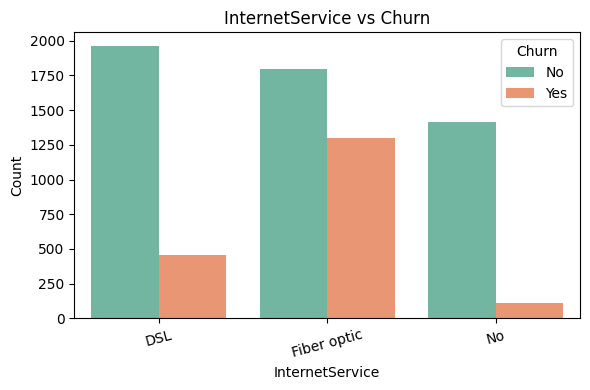

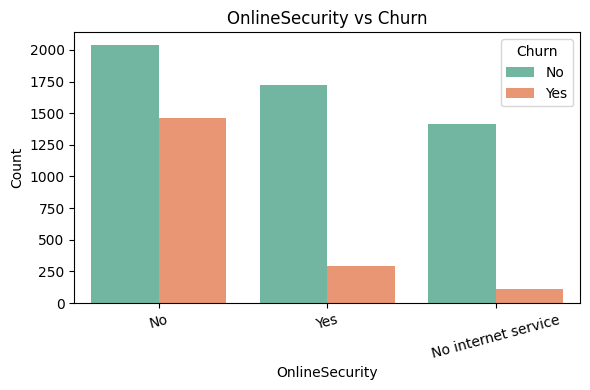

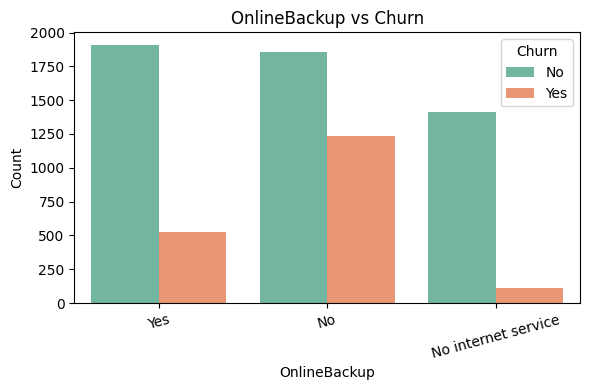

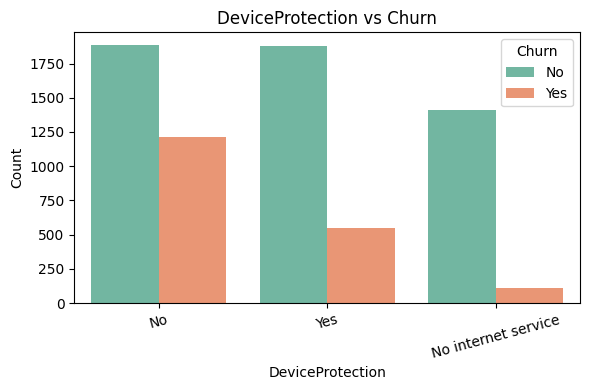

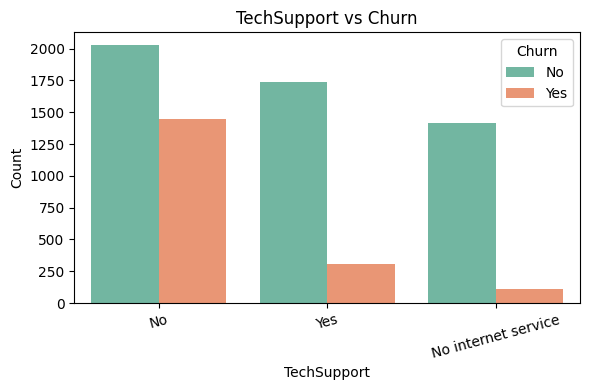

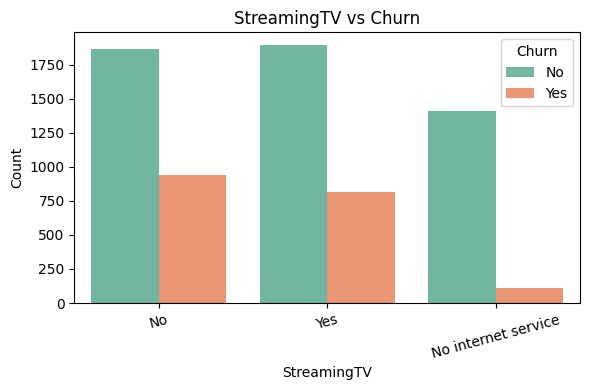

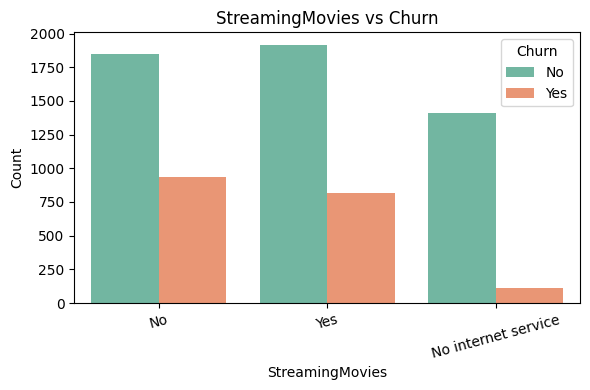

In [15]:
service_cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

for col in service_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.savefig(f'../images/{col.lower()}_vs_churn.png', bbox_inches='tight')
    plt.show()


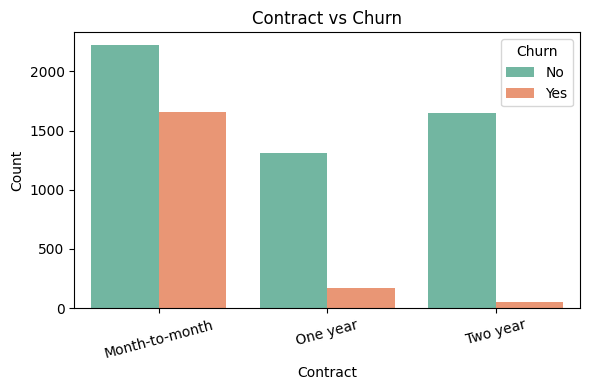

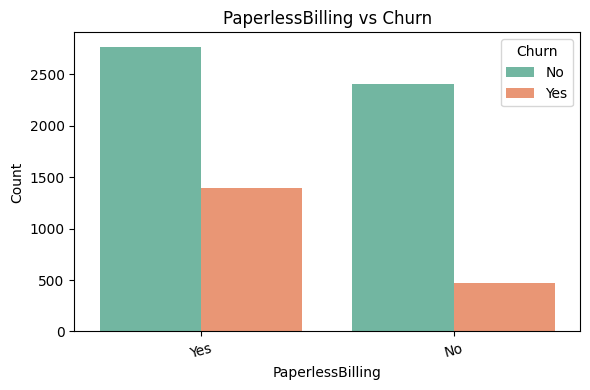

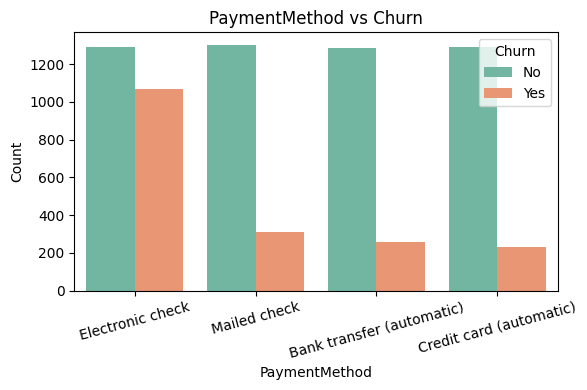

In [16]:
billing_cols = ['Contract', 'PaperlessBilling', 'PaymentMethod']

for col in billing_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn', palette='Set2')
    plt.title(f'{col} vs Churn')
    plt.xlabel(col)
    plt.ylabel('Count')
    plt.legend(title='Churn')
    plt.xticks(rotation=15)
    plt.tight_layout()
    plt.savefig(f'../images/{col.lower()}_vs_churn.png', bbox_inches='tight')
    plt.show()

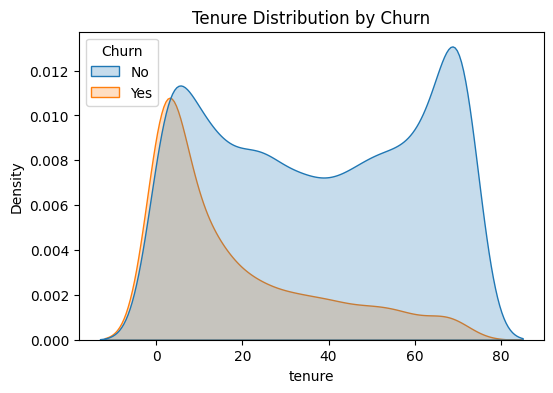

C:\Users\ask12\AppData\Local\Temp\ipykernel_18396\1285700855.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')


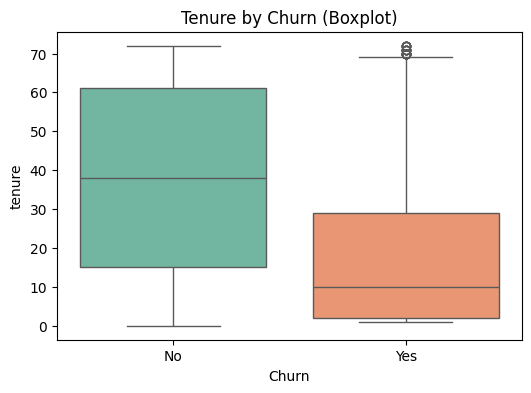

In [17]:
# KDE Plot
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='tenure', hue='Churn', fill=True)
plt.title('Tenure Distribution by Churn')
plt.savefig('../images/tenure_kde.png', bbox_inches='tight')
plt.show()

# Boxplot
plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='tenure', palette='Set2')
plt.title('Tenure by Churn (Boxplot)')
plt.savefig('../images/tenure_boxplot.png', bbox_inches='tight')
plt.show()


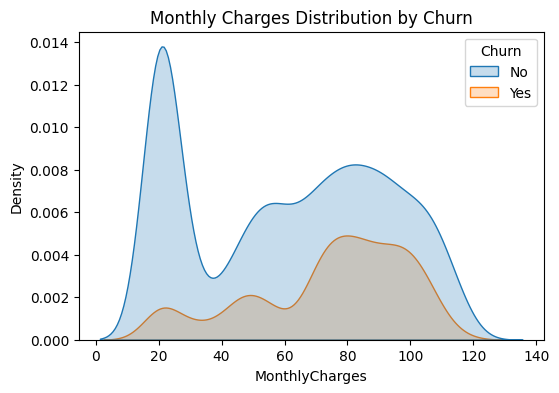

C:\Users\ask12\AppData\Local\Temp\ipykernel_18396\3113104992.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')


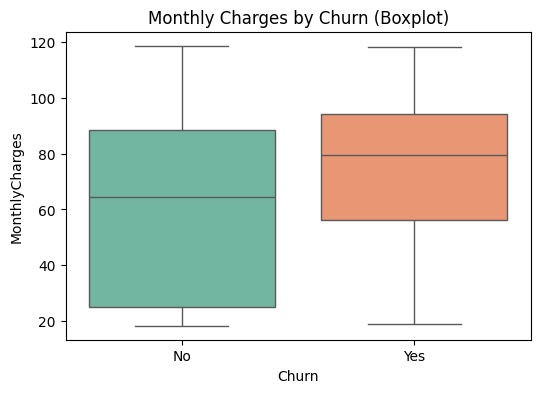

In [18]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='MonthlyCharges', hue='Churn', fill=True)
plt.title('Monthly Charges Distribution by Churn')
plt.savefig('../images/monthlycharges_kde.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='MonthlyCharges', palette='Set2')
plt.title('Monthly Charges by Churn (Boxplot)')
plt.savefig('../images/monthlycharges_boxplot.png', bbox_inches='tight')
plt.show()


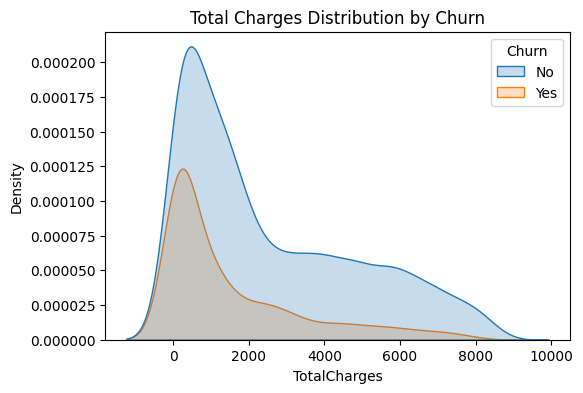

C:\Users\ask12\AppData\Local\Temp\ipykernel_18396\1625013472.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set2')


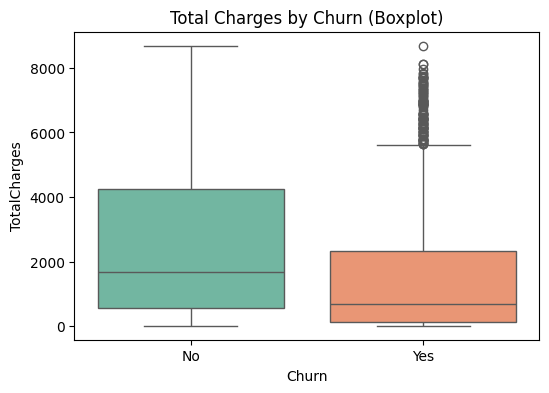

In [19]:
plt.figure(figsize=(6, 4))
sns.kdeplot(data=df, x='TotalCharges', hue='Churn', fill=True)
plt.title('Total Charges Distribution by Churn')
plt.savefig('../images/totalcharges_kde.png', bbox_inches='tight')
plt.show()

plt.figure(figsize=(6, 4))
sns.boxplot(data=df, x='Churn', y='TotalCharges', palette='Set2')
plt.title('Total Charges by Churn (Boxplot)')
plt.savefig('../images/totalcharges_boxplot.png', bbox_inches='tight')
plt.show()


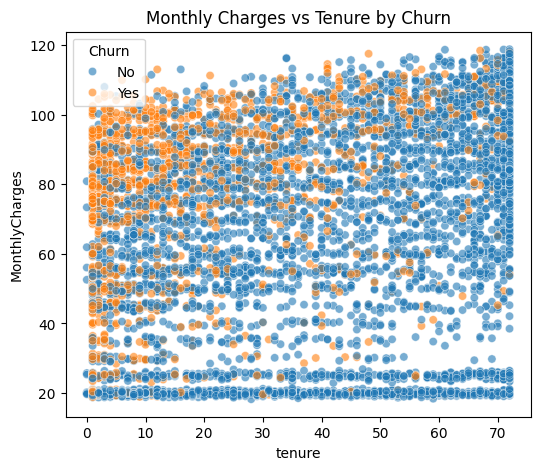

In [6]:
plt.figure(figsize=(6, 5))
sns.scatterplot(data=df, x='tenure', y='MonthlyCharges', hue='Churn', alpha=0.6)
plt.title('Monthly Charges vs Tenure by Churn')
plt.savefig('../images/charges_vs_tenure_scatter.png', bbox_inches='tight')
plt.show()


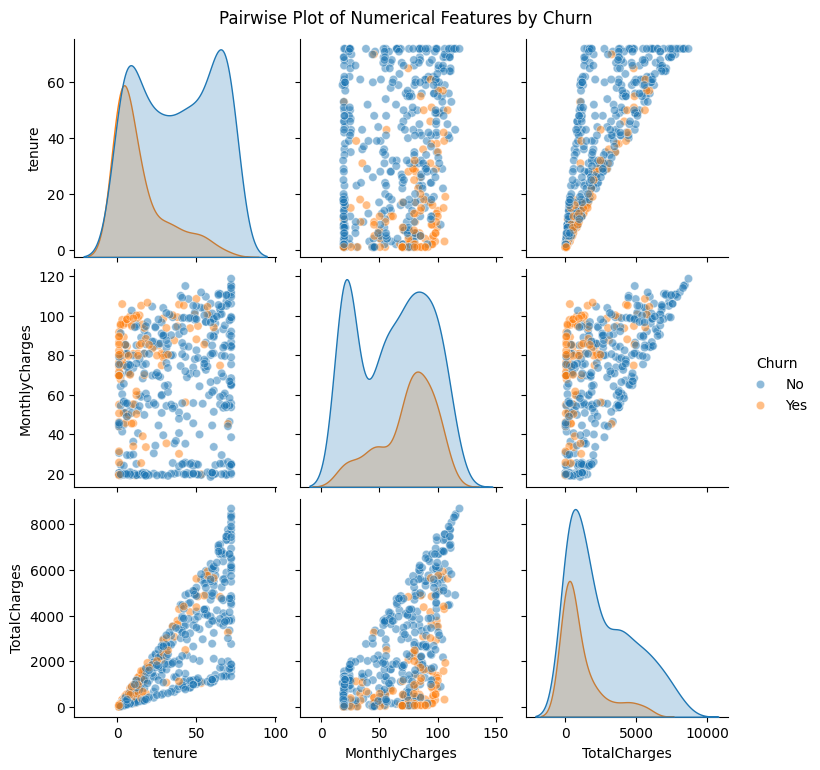

In [7]:
sns.pairplot(df.sample(500), vars=['tenure', 'MonthlyCharges', 'TotalCharges'], hue='Churn', plot_kws={'alpha': 0.5})
plt.suptitle("Pairwise Plot of Numerical Features by Churn", y=1.02)
plt.savefig('../images/numeric_pairplot.png', bbox_inches='tight')
plt.show()


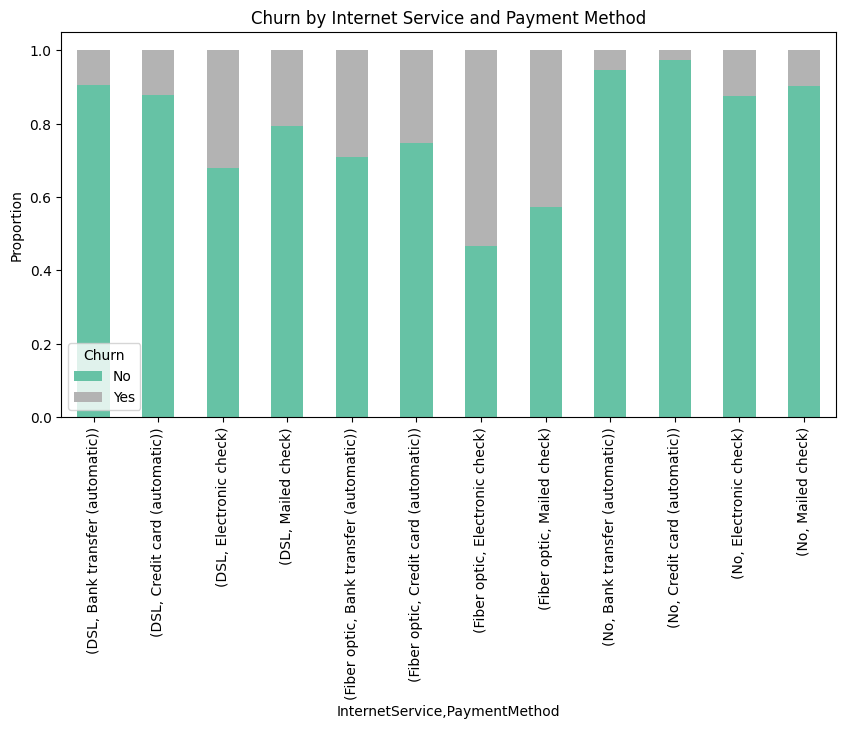

In [8]:
crosstab = pd.crosstab([df['InternetService'], df['PaymentMethod']], df['Churn'], normalize='index')
crosstab.plot(kind='bar', stacked=True, figsize=(10, 5), colormap='Set2')
plt.title('Churn by Internet Service and Payment Method')
plt.ylabel('Proportion')
plt.savefig('../images/internet_payment_churn.png', bbox_inches='tight')
plt.show()
